$$\require{mhchem}$$       

# Treating catalyst deactivation

We are interested in catalytic cracking of oil to various products:
\begin{align}
\ce{Gas/oil(A)&->[k_A]Products}
\end{align}
The rate law is $r_A=k_AC_A^2$. Gas oil (A) is fed at a rate of 30 mol/min and a concentration
of 0.075 mol/dm$^3$. You can neglect pressure or volumetric flow rate changes along the reactor.
The catalyst is not allowed to leave the reactor. 

#### The reactor is a 100 L CSTR with 22 kg of catalyst. Calculate the steady-state concentration of A and the steady-state concentration of P. The reaction rate constant $k_A = 600\: dm^6/(kg_{cat}\cdot mol\cdot min)$ at 500 K; assume the reactor is held at 500 K.

In [1]:
import numpy as np
from scipy.optimize import fsolve
V = 100 #l
M = 22 #kg
ka = 600 #dm^6/(kg.mol.min)
T = 500 #K
Fain = 30 #mol/min
Cain = 0.075 #mol/dm^3
Cin = [Cain,0]
v0 = Fain / Cain
tau = V/v0
#Steady state CSTR

def CSTR (C):
    #dFdt = Fain - Faout + Fgen
    Ca,Cp = C
    r1 = ka * Ca * Ca * M #mol/(min)
    ra = -r1
    rp = r1
    
    dCadt = Cain/tau - Ca/tau + ra/V
    dCpdt = 0 - Cp/tau + rp/V
    
    dCdt=[dCadt,dCpdt]
    
    return dCdt

ans=fsolve(CSTR,Cin)
print ("Ca goes down to ",ans[0],"mol/l while Cp rises upto ",ans[1])    
    
X = (Cain - ans[0])/Cain
print ("Conversion is:",X)
#10

Ca goes down to  0.0348714364219 mol/l while Cp rises upto  0.0401285635781
Conversion is: 0.535047514375


#### We know that the catalyst activity decreases over time due to deactivation so we need to model this as a transient CSTR  starting with A at 0.075 mol/dm$^3$ an P at 0.010 mol/dm$^3$. The reaction rate decays as $k_A=k_A^0 \exp(- k_D t)$ where $k_D=0.72$/min, $t$ is time, and $k_A^0$ is the rate constant at 500 K (above). Calculate the concentration profile of A and the products P for the first 20 min.

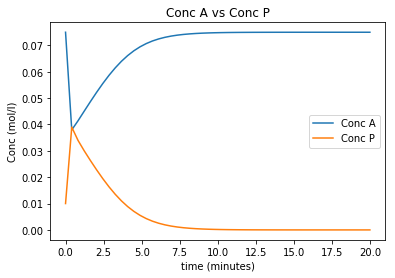

In [2]:
import numpy as np
from scipy.integrate import odeint
V = 100 #l
M = 22 #kg
ka0 = 600 #dm^6/(kg.mol.min)
kd = 0.72 #min^-1
T = 500 #K
Fain = 30 #mol/min
Cain = 0.075 #mol/dm^3
Cin = [Cain,0]
v0 = Fain / Cain
tau = V/v0


Ca0 = 0.075 #mol/dm^3
Cp0 = 0.01 #mol/dm3
C0 = [Ca0,Cp0]
duration = 20 #min
tspan = np.linspace(0,20)

#Transient CSTR

def CSTR_transient (C,t):
    #dFdt = Fain - Faout + Fgen
    Ca,Cp = C
    ka = ka0 * np.exp(-kd*t)
    r1 = ka * Ca*Ca * M #mol/(min)
    ra = -r1
    rp = r1
    
    dCadt = Cain/tau - Ca/tau + ra/V
    dCpdt = 0 - Cp/tau + rp/V
    
    dCdt=[dCadt,dCpdt]
    
    return dCdt

ans=odeint(CSTR_transient,C0,tspan)

import matplotlib.pyplot as plt
plt.plot(tspan,ans[:,0],tspan,ans[:,1])

plt.title("Conc A vs Conc P")
plt.legend(["Conc A", "Conc P"])
plt.xlabel("time (minutes)")
plt.ylabel("Conc (mol/l)")
plt.show()
#10

#### You plan to combat the effects of the catalyst decay by increasing the temperature over time.  The activation energy for the reaction is 10 kJ/mol.  Calculate and plot the transient temperature profile necessary to maintain the reactor conversion at the steady state value. The maximum safe temperature for the reactor and process is 1000 K. How long can you maintain this process before violating safety temperature limits and having to recharge the catalyst?

/opt/conda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


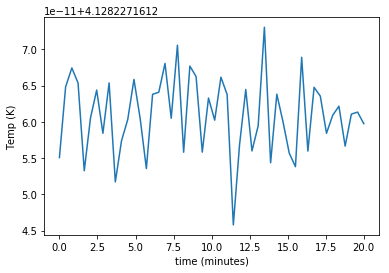

In [3]:
import numpy as np
from scipy.integrate import odeint
V = 100 #l
M = 22 #kg
ka0 = 600 #dm^6/(kg.mol.min)
T0 = 500 #K
#Transient CSTR
Ea = 10000  #J/mol
R = 8.314

def k(k0):
    return ka0-k0*np.exp(-Ea/R/T)
k0=fsolve(k,100)

Fain = 30 #mol/min
Cain = 0.075 #mol/dm^3
Cin = [Cain,0]
v0 = Fain / Cain
tau = V/v0
t=1

Ca0 = 0.075 #mol/dm^3
Cp0 = 0.01 #mol/dm3
C0 = [Ca0,Cp0]




Tspan=[]
tspan=np.linspace(0,20)
t=[]
for i,time in enumerate(tspan): 
    def cstr (T):
        return k0*np.exp(-kd*time)*np.exp(-Ea/R/T)/ka0
    #print(i)
    Temp=fsolve(cstr,100)    
    if (T>1000):
        break
    t.append(time)   
    Tspan.append(Temp)    
    
plt.plot(t,Tspan)
plt.xlabel('time (minutes)')
plt.ylabel('Temp (K)')
plt.show()

#check solution 5

#### You suggest moving to a moving, packed bed reactor configuration, where the catalyst moves along the reactor length co-currently with the reactants, but at a specified flow rate $U_s$ of $10\:kg/min$.  The packed bed reactor still contains 22 kg of catalyst at all times. You can model this as a normal packed bed reactor, with the rate constant for the catalyst at a specific point in the reactor calculated from its residence time, $\tau$:  $k_A=k_A^0\exp(-k_D\tau)$. This residence time can be calculated as a function of the total mass of catalyst that the reactants have seen, $W$:  $\tau(W)=W/U_s$. Plot the molar flowrate of species A and P as a function of $W$. Assume that we will use a constant reactor temperature of 500 K.

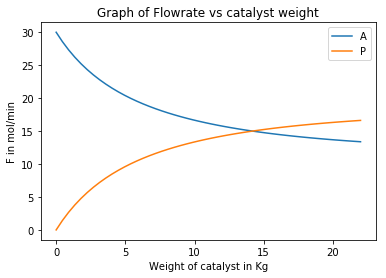

In [4]:

Us = 10 #kg/min
M = 22 #kg
Fa0= 30
Ca0 = 0.075
Fp0 = 0
F0 = [Fa0,Fp0]

v0 = Fa0/Ca0
kd = 0.72 #min^-1
Wspan = np.linspace(0,22)
def movingPBR (F,W):
    Fa,Fp = F
    tau = W/Us
    ka = ka0 * np.exp(-kd*tau)
    Ca = Fa/v0
    Cp = Fp/v0
    r1 = ka * Ca*Ca
    ra = -r1
    rp = r1
    dFadt = ra
    dFpdt = rp
    dFdt = [dFadt,dFpdt]
    return dFdt
from scipy.integrate import odeint
ans = odeint(movingPBR,F0,Wspan)
import matplotlib.pyplot as plt

plt.plot(Wspan,ans[:,0],Wspan,ans[:,1])

plt.xlabel("Weight of catalyst in Kg")
plt.ylabel("F in mol/min")
plt.legend(["A","P"])
plt.title("Graph of Flowrate vs catalyst weight")
plt.show()

#10

#### With your new reactor configuration, find the optimal reactant flow rate $v_0$ and catalyst feed rate $U_s$ to maximize profit, and report this profit. Assume you're going to sell all product you make.
Useful information:
- It costs $\$25,000/hr$ to operate the moving bed reactor.
- The gas/oil feed costs \$50/mol.
- Bulk catalyst material costs \$150/kg.
- The products sell for \$200/mol (on an equivalent basis per mol of gas/oil).

Tip: it can help to plot profit as a function of Us and v0 using plt.contour to help identify what is reasonable, just as we did in the bonus for HW5.

In [5]:
from scipy.integrate import odeint
from scipy.optimize import fmin

Us = 10 #kg/min
M = 22 #kg
Ca0 = 0.075
kd = 0.72 #min^-1
Wspan = np.linspace(0,22)
def movingPBR (F,W):
    Fa,Fp = F
    tau = W/Us
    ka = ka0 * np.exp(-kd*tau)
    Ca = Fa/v0
    Cp = Fp/v0
    r1 = ka * Ca*Ca
    ra = -r1
    rp = r1
    dFadt = ra
    dFpdt = rp
    dFdt = [dFadt,dFpdt]
    return dFdt

y=[v0,Us]
def loss(y):
    v0,Us = y
    Fa0=v0*Ca0
    F0=[Fa0,0]
    ans = odeint(movingPBR,F0,Wspan)
    Fpout = ans[-1,1]
    l= -(200 * Fpout - 150*Us - 50*Fa0 - 25000/60)
    return [l,l]
guess=[400,10]
ans=fsolve(loss,guess)

print("The maximum profit occurs when flowrate is",ans[0],"and Us is ",ans[1])
print("This is the local maxima")

#what is the profit? 7

The maximum profit occurs when flowrate is 411.213775336 and Us is  10.0019446716
This is the local maxima


#### You complain to your catalyst vendor about how fast the catalyst deactivates, and they suggest you try their new SuperPremium+++ catalyst. It costs \$250/kg but is more resilient and has an improved deactivation rate constant of $k_D=0.3$/min. Will this change be worth it? Decide by calculating the expected profit with this new catalyst.

In [6]:
from scipy.integrate import odeint
from scipy.optimize import fmin

Us = 10 #kg/min
M = 22 #kg
Ca0 = 0.075
kd = 0.3 #min^-1
Wspan = np.linspace(0,22)
def movingPBR (F,W):
    Fa,Fp = F
    tau = W/Us
    ka = ka0 * np.exp(-kd*tau)
    Ca = Fa/v0
    Cp = Fp/v0
    r1 = ka * Ca*Ca
    ra = -r1
    rp = r1
    dFadt = ra
    dFpdt = rp
    dFdt = [dFadt,dFpdt]
    return dFdt

y=[v0,Us]
def loss(y):
    v0,Us = y
    Fa0=v0*Ca0
    F0=[Fa0,0]
    ans = odeint(movingPBR,F0,Wspan)
    Fpout = ans[-1,1]
    l= -(200 * Fpout - 250*Us - 50*Fa0 - 25000/60)
    return [l,l]
guess=[400,10]
ans=fsolve(loss,guess)

print("The maximum profit occurs when flowrate is",ans[0],"and Us is ",ans[1])
print("This is the local maxima")

print("As the new Us is less than previous one, we'd need less catalyst to achieve same conversion. Hence it is advisable to change to new catalyst")

#what is profi? 7

The maximum profit occurs when flowrate is 399.999999806 and Us is  7.79789821641
This is the local maxima
As the new Us is less than previous one, we'd need less catalyst to achieve same conversion. Hence it is advisable to change to new catalyst


# Catalyst particles

A first-order heterogeneous irreversible reaction is taking place within a spherical catalyst pellet that is plated with platinum throughout the pellet. The reactant concentration halfway between the external surface and the center of the pellet ($r=R/2$) is equal to one tenth the concentration of the pellet's external surface.  The concentration at the external surface is 0.001 g mol /dm^3, the diameter (2R) is $2\times 10^{-3}$cm, and the diffusion coefficient is 0.1 $cm^2/s$.
\begin{align*}
\ce{A->B}
\end{align*}

#### What is the concentration of reactant at a distance of $3\times 10^{-4}$ cm in from the external pellet surface?

In [7]:
import numpy as np
from scipy.optimize import fsolve
De= 1e-5 #m2/s
Cs=1 #mol/m3 
R= 1e-5 
a=R/3
r=R-3e-6 #m

def fun1(k0):
    r=(R/2)/a
    C=(Cs/10)/Cs
    phi=(k0*a**2/De)**0.5
    return C*r*np.sinh(3*phi)-3*np.sinh(phi*r)

KNUD=fsolve(fun1,1e8)

def phi(Ca):
    Radius=(r)/a
    C=Ca/Cs
    phi=(KNUD*a**2/De)**0.5
    return C*Radius*np.sinh(3*phi)-3*np.sinh(phi*Radius)
Conc=fsolve(phi,1)
    
print("Conc_A is",Conc[0]/1000," mol/dm3 at the given distance") 

#10

Conc_A is 0.000237050601526  mol/dm3 at the given distance


#### To what diameter should the pellet be reduced if the effectiveness factor is to be 0.8? 

In [8]:
import numpy as np
from scipy.optimize import fsolve
De= 1e-5 #m2/s
Cs=1 #mol/m3 
R= 1e-5 
a=R/3
r=R-3e-6 #m

def fun1(k0):
    r=(R/2)/a
    C=(Cs/10)/Cs
    phi=(k0*a**2/De)**0.5
    return C*r*np.sinh(3*phi)-3*np.sinh(phi*r)

KNUD=fsolve(fun1,1e8)

def phi(Ca):
    Radius=(r)/a
    C=Ca/Cs
    phi=(KNUD*a**2/De)**0.5
    return C*Radius*np.sinh(3*phi)-3*np.sinh(phi*Radius)
Conc=fsolve(phi,1)

def effective(R):
    a=R/3
    r1=(r)/a
    C=Conc/Cs
    phi=(KNUD*a**2/De)**0.5
    return 0.8*phi-1/np.tanh(3*phi)-1/3/phi

radius=fsolve(effective,1)
print ("The required diameter is:",radius[0]*2*100,"cm")

#10

The required diameter is: 0.0015271709658 cm
